- ### [Wikipedia - Correlation analysis](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
- ### [Seaborn - scatterplot](https://seaborn.pydata.org/examples/scatterplot_sizes.html)


In [36]:
import seaborn.apionly as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats as smf
smf('retina')
sns.set()
%matplotlib inline

In [3]:
planets = sns.load_dataset("planets")
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [13]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [17]:
zoom = planets[(planets['distance'] < 200) & (planets['orbital_period'] < 7500)]

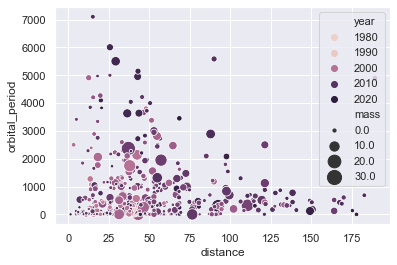

In [21]:
sns.scatterplot(data=zoom, x='distance', y='orbital_period', hue='year', size='mass', sizes=(10,200))

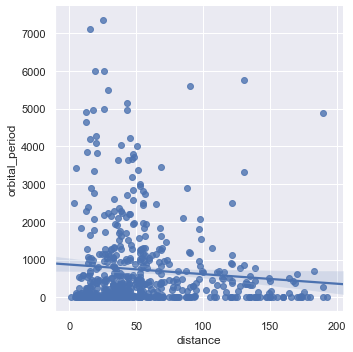

In [22]:
sns.lmplot(data=zoom, x='distance', y='orbital_period')

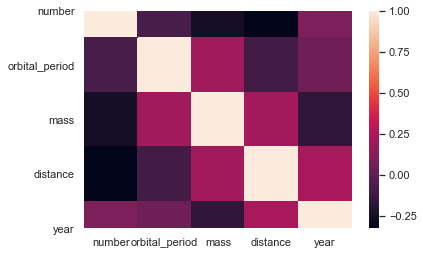

In [24]:
z = zoom.corr()
sns.heatmap(z)

                  number  orbital_period      mass  distance      year
number          1.000000       -0.066998 -0.248385 -0.325262  0.094386
orbital_period -0.066998        1.000000  0.206282 -0.091873  0.044481
mass           -0.248385        0.206282  1.000000  0.209110 -0.157250
distance       -0.325262       -0.091873  0.209110  1.000000  0.227356
year            0.094386        0.044481 -0.157250  0.227356  1.000000


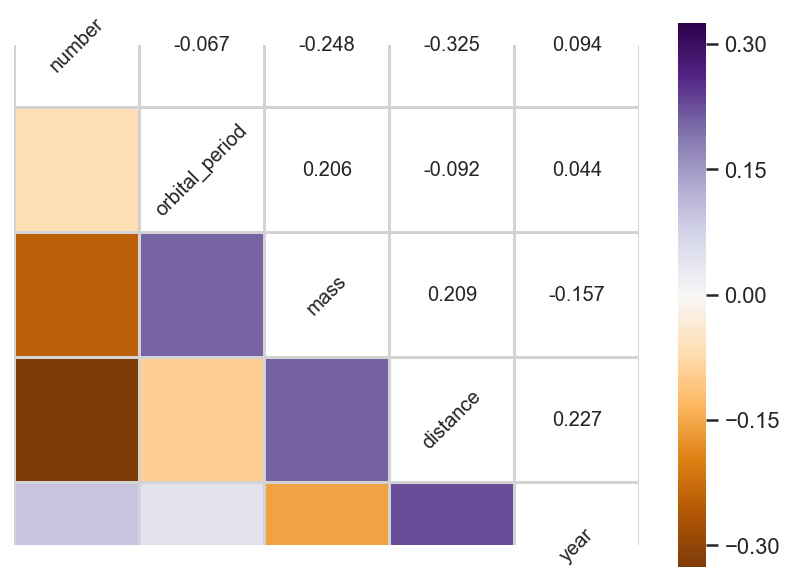

In [123]:
corr = zoom.corr()
print(corr)

# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, 1,figsize=(7,5), sharex=True)
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap='PuOr', vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)

for i in range(len(corr)):
    ax.text(
        i+0.5,(i+0.5), corr.columns[i], ha="center",
        va="center", rotation=45
    )
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(
            j+0.5,(i+0.5),s, 
            ha="center", va="center"
        )

ax.axis('off')
plt.show()

### 피어슨 상관 계수
피어슨 상관 계수(Pearson correlation coefficient 또는 Pearson's r)는 두 변수간의 관련성을 구하기 위해 보편적으로 이용된다. 개념은 다음과 같다.

$$ r={\text{X와 Y가 함께 변하는 정도} \over \text{X와 Y가 각각 변하는 정도}}$$

결과의 해석
r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination) 는 $$ r^{2} $$ 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

일반적으로

- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
로 해석한다.

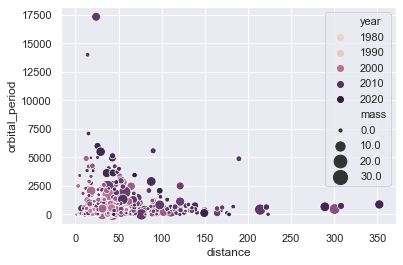

In [14]:
sns.scatterplot(
    data=planets, x='distance', y='orbital_period', hue='year',
    size = 'mass', sizes=(10,200), palette=''
)